<a href="https://colab.research.google.com/github/chrisjulio/INFO7017/blob/main/T2_1_Keras01_Christiano_Guilherme_Marcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="#ff9900"> **MLP com Keras**</font>
---

<font color="#66ffff">**Keras**</font> (https://keras.io/) é uma biblioteca de rede neural de código aberto escrita em Python. É projetada para ser amigável ao usuário, modular e extensível, fornecendo uma interface de alto nível para construir e treinar modelos de aprendizado profundo. O Keras é construído em cima de outros *frameworks* populares de aprendizado profundo como `TensorFlow` (https://www.tensorflow.org/), Microsoft Cognitive Toolkit -`CNTK` (https://learn.microsoft.com/en-us/cognitive-toolkit/) e `Theano` (https://github.com/Theano/Theano), o que permite que ele aproveite o poder e desempenho desses *frameworks* enquanto fornece uma interface mais acessível e fácil de usar. Tais *frameworks* são o *backend* computacional do Keras.

O próprio `TensorFlow` vem com uma implementação particular do Keras, `tf.keras`. Há suporte apenas ao `TensorFlow` como *backend*, oferecendo a vantagem de suporte ao TensorFlow Data API.

Além das bibliotecas ``Numpy``, ``Pandas`` e ``Matplotlib``, vamos utilizar ``keras`` de ``tensorflow``.


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow import keras

print(f'Keras:{keras.__version__}')  # version

Keras:3.8.0


Criação do Modelo
--

Vamos criar um modelo simples com duas *hidden layers*. ``Sequential``é um modelo Keras composto de camadas empilhadas e conectadas sequencialmente entre si.

> A primeira camada define uma entrada de $28 \times 28$.

> Já a camada seguinte converte a entrada em um *array* 1D de 784 valores. No nosso caso deve receber o *shape* das imagens ($28 \times 28$), discutidas mais adiante. Prepara a entrada para as camadas *fully connected* (`Dense`) que virão a seguir.

> A próxima camada é uma camada densa com $300$ neurônios e uma função de ativação. Essa função de ativação <font color="#66ffff">**ReLU**</font> (Rectified Linear Unit) é um *rectifier*. Foi apresentada por Kunihiko Fukushima (1969) no contexto de extração de *visual features* em NNs. Principalmente a partir de 2011 vem sendo amplamente utilizada no treinamento de NNs profundas em substituição às funções *sigmoid* e *hyperbolic tangent*.


\begin{align}
  f(x) = x^+ = max(x, 0) = \left\{
        \begin{array}{cl}
             x & x \gt 0 \\
             0 & otherwise             
        \end{array}
        \right.
\end{align}

sendo $x$ o neurônio de entrada.

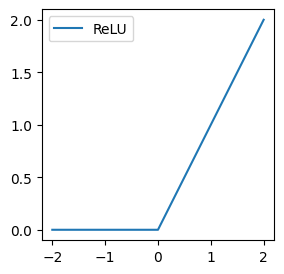

In [ ]:
def relu(x):
    return np.maximum(0, x)

x = np.linspace(start = -2, stop = 2, num = 41)

fig = plt.figure(figsize=(3, 3))
ax = plt.plot(x, relu(x), label='ReLU')

plt.legend(loc='upper left')

plt.show()

> A próxima camada também é uma densa com 100 neurônios e usa a função ReLU.

> Finalmente a última camada também é uma camada densa com 10 neurônios (um por classe do nosso problema). Como as classes são exclusivas, está sendo definida a função de ativação *softmax*, produzindo probabilidades.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

> O método ``summary()`` do objeto ``model`` exibe as camadas definidas no modelo. ``None``indica que o parâmetro *batch size* pode ser qualquer.

In [ ]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


As camadas do modelo podem ser acessadas individualmente.

In [ ]:
print(model.layers)

hidden1 = model.layers[1]  # first hidden layer

print(f'\nFirst hidden layer name:{hidden1.name}')

[<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]

First hidden layer name:dense


E os parâmetros de uma camada pode ser obtidos com ``get_weights``.

Perceba os pesos (``weights``) inicializados randomicamente e os termos bias com zero.

In [ ]:
weights, biases = hidden1.get_weights()

print(f'Layer weights shape:\n{weights.shape}')
print(f'\nLayer weights:\n{weights}')

print(f'\nLayer biases shape:\n{biases.shape}')
print(f'\nBiases:\n{biases}')

Layer weights shape:
(784, 300)

Layer weights:
[[ 0.03829078 -0.04961967  0.03430311 ... -0.05720692  0.04439588
   0.06095482]
 [-0.03373238 -0.02212441 -0.05559079 ...  0.02975967  0.04373763
   0.02484309]
 [-0.06666434 -0.06973268  0.03199662 ...  0.03798067 -0.06729236
   0.06988885]
 ...
 [-0.06357284 -0.06031392  0.06492947 ... -0.03711227  0.01954284
   0.0468386 ]
 [ 0.04816267 -0.04023541  0.00035866 ... -0.04615157  0.00789145
  -0.01560023]
 [ 0.02853511 -0.07150727  0.00311255 ... -0.02739815 -0.06605478
  -0.01293719]]

Layer biases shape:
(300,)

Biases:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

---

> 💡 **Nota**:
É  importante destacar que as camadas densas possuem muitos parâmetros. Vejamos o caso da primeira *hidden layer*: são $784 \times 300$ pesos mais $300$ termos bias, ou seja, 235 500 parâmetros! 🙀 Essa quantidade enorme de parâmetros permite ao modelo ajustar-se de forma flexível aos dados de entrada, mas pode gerar *overfitting*, principalmente quando a quantidade de instâncias de treinamento é insuficiente.

---

Importação de um *Dataset* e Análise Exploratória
--

Vamos usar o *dataset* <font color="#ff9900">**Fashion MNIST** </font> (https://github.com/zalandoresearch/fashion-mnist) que é uma coleção de 70.000 imagens em escala de cinza de itens de vestuário, cada uma com tamanho de $28 \times 28$ pixels. Foi projetado como um substituto do conjunto de dados MNIST (http://yann.lecun.com/exdb/mnist/) mais tradicional, que contém dígitos manuscritos. Os itens de vestuário Fashion MNIST incluem itens como camisetas, calças, vestidos, tênis e sandálias, entre outros. É um *dataset* mais desafiador do que o MNIST original, pois contém imagens mais complexas e variadas. Também é mais relevante para aplicações do mundo real, pois imita de perto o tipo de imagens que são comumente encontradas em aplicativos de comércio eletrônico e *sites* de compras *on-line*.



In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Carregada a base, vamos investigar o conteúdo. Cada imagem é representada como um *array* $28 \times 28$, sendo cada intensidade na faixa $0-255$ ao invés de floats.

In [ ]:
print(f'Dataset shape:{X_train_full.shape}')

print(f'First instance shape:{X_train_full[0].shape}')
print(f'\nFirst instance:\n {X_train_full[0]}')

Dataset shape:(60000, 28, 28)
First instance shape:(28, 28)

First instance:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141

Mas o que é esse *array*? 🤔
Vamos exibi-lo como uma imagem usando ``plt.imshow``.


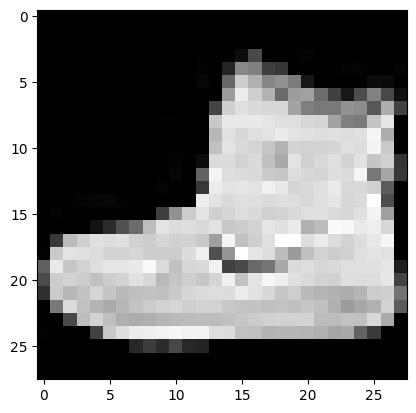

In [ ]:
fig = plt.imshow(X_train_full[0], cmap=plt.cm.gray)
plt.show()

Super! Parece um tipo de calçado, *ankle boot*. 👢

Felizmente temos o rótulo de cada imagem (instância). Vamos mapear o códigos das rótulos para os nomes das classes. Veja em https://github.com/zalandoresearch/fashion-mnist.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Vamos exibir algumas instâncias. Lembrando que os códigos dos rótulos estão em ``y_train_full``.

In [ ]:
print(f'Class name of first instance: {class_names[y_train_full[0]]}')

Class name of first instance: Ankle boot


Com isso vamos gerar uma grade para visualizar as 25 primeiras instâncias do dataset `X_train_full`.

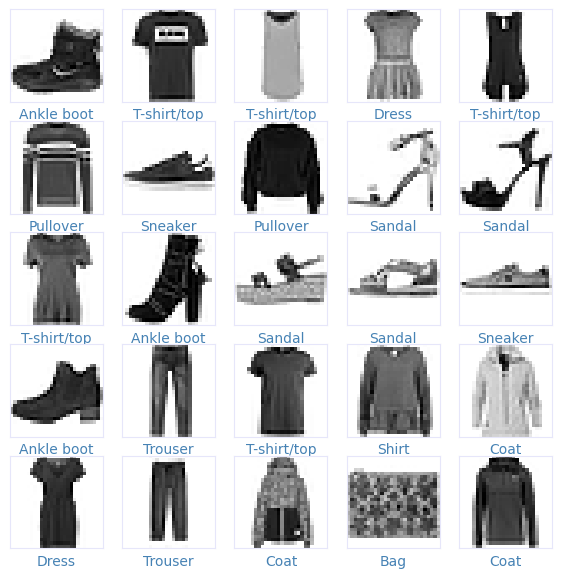

In [ ]:
# import matplotlib.colors as mcolors

plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(7, 7))

for i in range(25):  # First 25 instances
    plt.subplot(5, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]], color='steelblue')

plt.show()

Veja que o *dataset* **já veio dividido em treinamento e teste**. Mas, vamos criar um conjunto adicional de validação, `X_valid`, e o respectivo conjunto de *labels* `y_valid`. Note que separamos 5000 instâncias para o conjunto de validação e o restante será usado para o treinamento.

E como estamos utilizando uma NN com o algoritmo de treinamento <font color="#66ffff">Gradient Descent (GD) </font> devemos normalizar as *features*. Aqui vamos colocar os pixels na escala $0-1$.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Compilação
--

Antes do modelo ser treinado ele precisa ser compilado através do método `compile`. Nesse momento especificamos qual será a função *loss* e qual será o otimizador. Opcionalmente podemos fornecer quais métricas de avaliação desejamos calcular durante o processo de treinamento, como por exemplo `accuracy`.

> A função `sparse_categorical_crossentropy` é usada para classes mutuamente exclusivas, i.e., cada instância pertence exatamente a uma classe. No nosso caso, índices exclusivos na faixa de $0$ a $9$.

> Nosso otimizador será Stochastic Gradient Descent (`sgd`). O default do *learning rate* é $0.01$. Assim, opcionalmente pode-se usar em `compile` com `optimizer=keras.optimizers.SGD(lr=eta)` fornecendo em `eta` o valor de *learning rate* desejado.

> Finalmente, em geral, desejamos saber a acurácia do nosso modelo classificador. Assim setamos `metrics` para `accuracy`.


Depois de compilado nosso modelo está pronto para ser treinado. Vamos lá!

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Treinamento
--

Para efetuar o treinamento basta chamar o método ``fit``, especificando o conjunto de treinamento ``X_train``, os respectivos labels ``y_train``, o número de épocas, aqui 30, e os conjuntos de validação correspondentes.


---

> 💡 **Nota**:
Destaca-se que a **validação é opcional**.

---


In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6806 - loss: 1.0038 - val_accuracy: 0.8192 - val_loss: 0.5226
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8250 - loss: 0.5009 - val_accuracy: 0.8490 - val_loss: 0.4420
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8435 - loss: 0.4509 - val_accuracy: 0.8576 - val_loss: 0.4234
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8556 - loss: 0.4193 - val_accuracy: 0.8638 - val_loss: 0.4034
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8600 - loss: 0.3990 - val_accuracy: 0.8676 - val_loss: 0.3839
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8683 - loss: 0.3792 - val_accuracy: 0.8656 - val_loss: 0.3866
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8699 - loss: 0.3672 - val_accuracy: 0.8720 - val_loss: 0.3682
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8746 - loss: 0.3525 - 

> Avaliação do Treinamento

Vamos plotar as curvas de acurácia e *loss*.

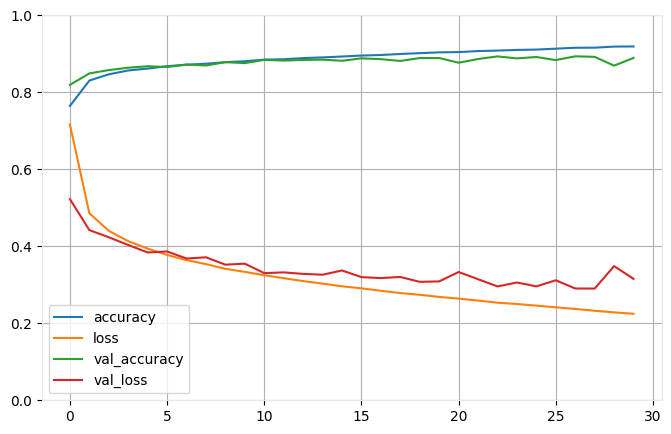

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8222 - loss: 80.9042


[84.92044067382812, 0.8192999958992004]

Conseguimos $\approx 85\%$!😹🥳

Classificação
--

Uma vez treinado o modelo podemos fazer predições com o método ``predict``.

Vamos ver como o modelo comporta-se com as vinte primeiras instâncias.

In [ ]:
X_new = X_test[:20]
y_proba = model.predict(X_new)

print(f'Probability scores:\n {y_proba.round(2)}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
Probability scores:
 [[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.21 0.   0.79 0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.

O modelo estima uma probabilidade por classe.

Mas, quais são essas classes?

In [ ]:
classes_y = np.argmax(y_proba, axis=1)

print(classes_y)

print(f'Predicted classes:\n {np.array(class_names)[classes_y]}')

[9 2 1 1 6 1 4 4 5 7 4 5 5 3 4 1 2 2 8 0]
Predicted classes:
 ['Ankle boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt' 'Trouser' 'Coat'
 'Coat' 'Sandal' 'Sneaker' 'Coat' 'Sandal' 'Sandal' 'Dress' 'Coat'
 'Trouser' 'Pullover' 'Pullover' 'Bag' 'T-shirt/top']


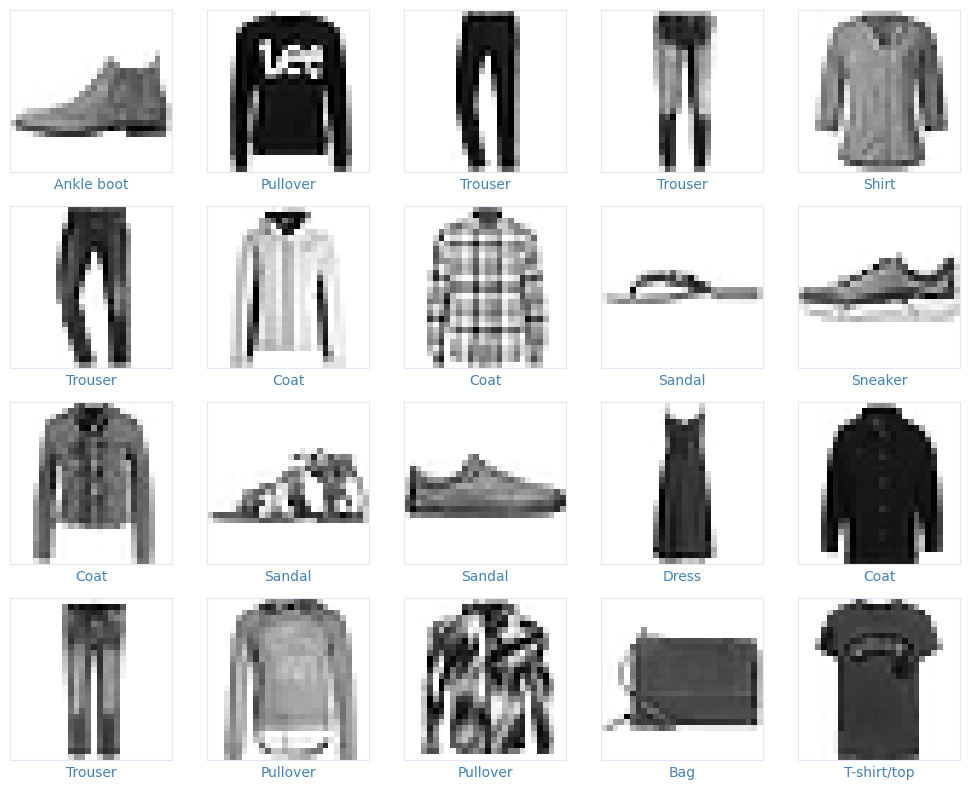

In [ ]:
plt.rc('axes',edgecolor='lavender')

fig = plt.figure(figsize=(10, 8))

for i in range(20):  # First 20 instances
    plt.subplot(4, 5, i + 1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_new[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[classes_y[i]], color='steelblue')

plt.tight_layout()
plt.show()

# Execução da Atividade

Vamos finalizar o teste sobe todas as instâncias.

In [ ]:
# Avaliação no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia final no teste: {test_acc:.4f}")

Acurácia final no teste: 0.8193


Para exibir as 10 primeiras imagens classificadas erroenamente.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Número de erros: 1807


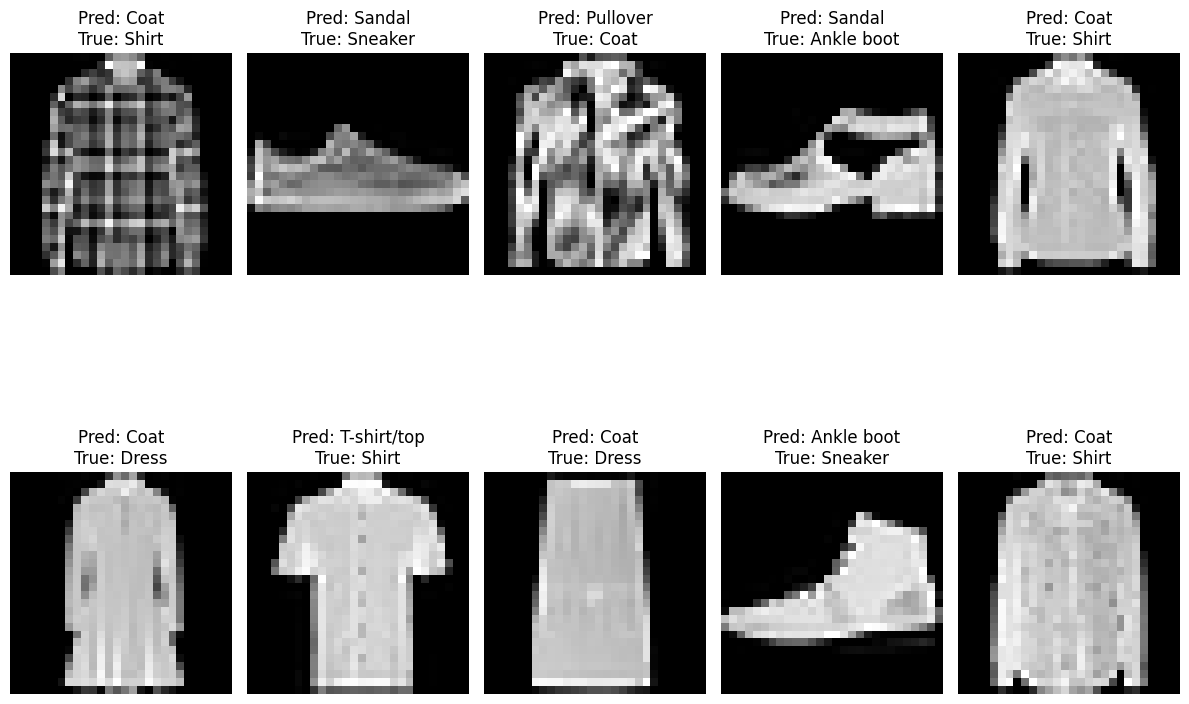

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nomes das classes do Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Predições
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = y_test  # já está em formato 1D com os rótulos

# Identificar erros
errors = np.where(y_pred_labels != y_true_labels)[0]
print(f"Número de erros: {len(errors)}")

# Exibir as primeiras 10 imagens incorretas
plt.figure(figsize=(12, 10))
for i, index in enumerate(errors[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_labels[index]]}\nTrue: {class_names[y_true_labels[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Precision, recall e f1-score por classe

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.90      0.98      0.94      1000
           2       0.81      0.64      0.71      1000
           3       0.89      0.81      0.85      1000
           4       0.53      0.96      0.68      1000
           5       0.96      0.95      0.95      1000
           6       0.80      0.29      0.42      1000
           7       0.98      0.77      0.86      1000
           8       0.93      0.98      0.95      1000
           9       0.81      0.99      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.81     10000
weighted avg       0.84      0.82      0.81     10000



Testando com mais esforço: hiperparâmetros modificados, mais épocas e neurônios

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Convert y_train to one-hot encoded format
y_train_one_hot = keras.utils.to_categorical(y_train)

history = model.fit(X_train, y_train_one_hot, epochs=50, validation_split=0.2)

Epoch 1/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6980 - loss: 1.0005 - val_accuracy: 0.8169 - val_loss: 0.5339
Epoch 2/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8224 - loss: 0.5120 - val_accuracy: 0.8328 - val_loss: 0.4856
Epoch 3/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8396 - loss: 0.4584 - val_accuracy: 0.8401 - val_loss: 0.4543
Epoch 4/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8491 - loss: 0.4270 - val_accuracy: 0.8522 - val_loss: 0.4261
Epoch 5/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8555 - loss: 0.4068 - val_accuracy: 0.8565 - val_loss: 0.4126
Epoch 6/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8624 - loss: 0.3928 - val_accuracy: 0.8573 - val_loss: 0.4102
Epoch 7/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8679 - loss: 0.3767 - val_accuracy: 0.8656 - val_loss: 0.3841
Epoch 8/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3597 - 

Tabela e gráfico com os resultados dos novos hiperparâmetros

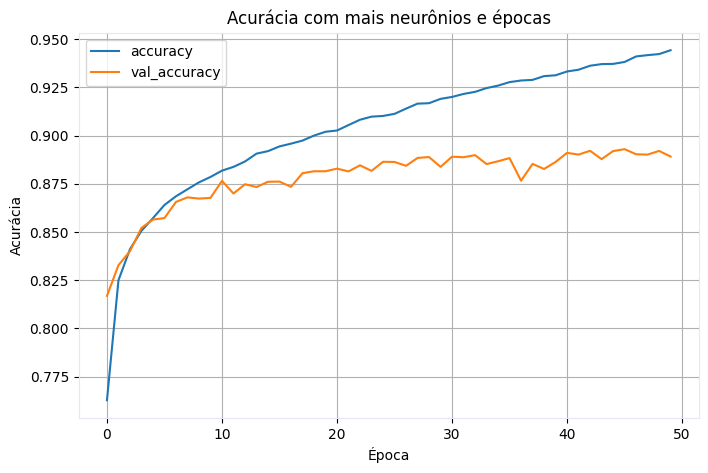

In [ ]:
import pandas as pd

results = pd.DataFrame(history.history)
results[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.title("Acurácia com mais neurônios e épocas")
plt.ylabel("Acurácia")
plt.xlabel("Época")
plt.grid(True)
plt.show()

Comparando otimizadores: Adam, RMSprop, Nadam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import classification_report

def build_and_train(optimizer_name):
    model = keras.models.Sequential([
        keras.layers.Input(shape=(28, 28)),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy", optimizer=optimizer_name, metrics=["accuracy"])

    # Convert y_train and y_test to one-hot encoded format
    y_train_one_hot = keras.utils.to_categorical(y_train)
    y_test_one_hot = keras.utils.to_categorical(y_test)

    # Use the one-hot encoded labels for training and validation
    history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), verbose=0)
    return history

opt_names = ['sgd', 'adam', 'rmsprop', 'nadam']
histories = {opt: build_and_train(opt) for opt in opt_names}

(abaixo só esta verificando se realmente está usando a GPU)

In [ ]:
import tensorflow as tf

print("GPU disponível:", tf.config.list_physical_devices('GPU'))

GPU disponível: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Plotando loss

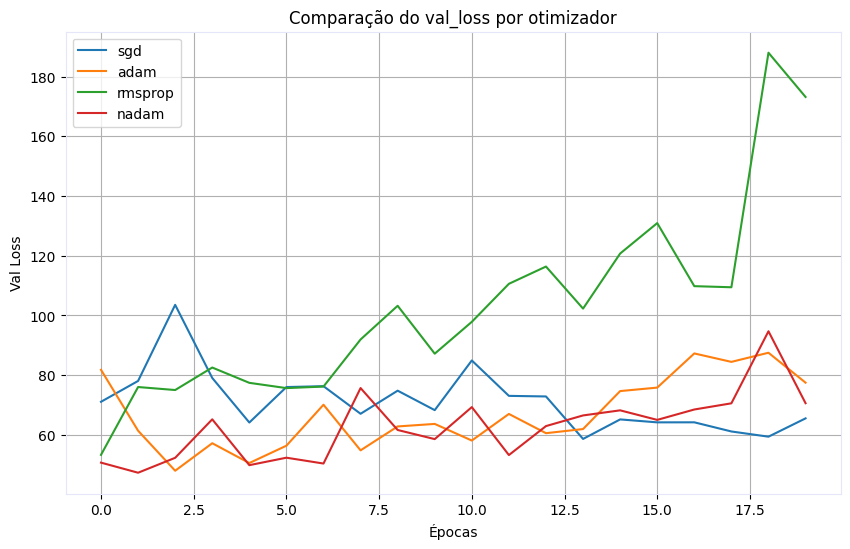

In [ ]:
plt.figure(figsize=(10, 6))
for opt in opt_names:
    plt.plot(histories[opt].history['val_loss'], label=f'{opt}')
plt.legend()
plt.title('Comparação do val_loss por otimizador')
plt.xlabel('Épocas')
plt.ylabel('Val Loss')
plt.grid(True)
plt.show()

Resumo em tabela:

In [ ]:
final_acc = {opt: histories[opt].history['val_accuracy'][-1] for opt in opt_names}
pd.DataFrame(final_acc.items(), columns=["Otimizador", "Acurácia final"])

,Otimizador,Acurácia final
0,sgd,0.8399
1,adam,0.8665
2,rmsprop,0.8640
3,nadam,0.8721


SGD: estável, mas é lento na convergência.
Adam: estável e com desempenho global melhor.
RMSprop: altamente instável, com picos muito altos.
Nadam: Val_loss baixa, com pequenas oscilações. Em alguns pontos, melhor que Adam.


Reexibindo resultados:

(aqui to na dúvida se faz sentido porque só copiei e colei o código lá de cima... não sei se são dados reclassificados...)


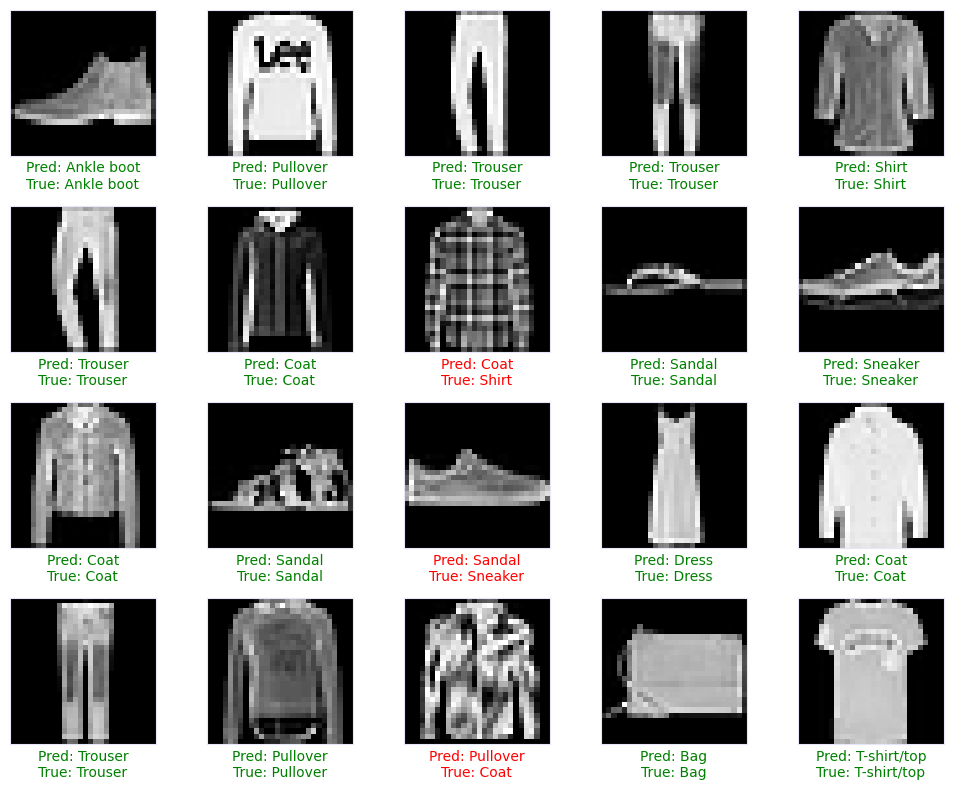

In [ ]:
# Supondo que y_pred_labels e y_true_labels estejam definidos
plt.figure(figsize=(10, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')

    pred = class_names[y_pred_labels[i]]
    true = class_names[y_true_labels[i]]
    color = 'green' if pred == true else 'red'

    plt.xlabel(f"Pred: {pred}\nTrue: {true}", color=color)

plt.tight_layout()
plt.show()

Refazendo Adam, mas com refino posterior (ajuste de taxa de aprendizado e dropout).

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Adam padrão
optimizer = keras.optimizers.Adam()

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Convertendo os rótulos
y_train_one_hot = keras.utils.to_categorical(y_train)

# Treinamento inicial
history = model.fit(X_train, y_train_one_hot, epochs=30, validation_split=0.2)

Epoch 1/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7762 - loss: 0.6295 - val_accuracy: 0.8414 - val_loss: 0.4160
Epoch 2/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8593 - loss: 0.3803 - val_accuracy: 0.8659 - val_loss: 0.3706
Epoch 3/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8766 - loss: 0.3334 - val_accuracy: 0.8795 - val_loss: 0.3379
Epoch 4/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8832 - loss: 0.3157 - val_accuracy: 0.8670 - val_loss: 0.3725
Epoch 5/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8940 - loss: 0.2841 - val_accuracy: 0.8765 - val_loss: 0.3438
Epoch 6/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8985 - loss: 0.2660 - val_accuracy: 0.8841 - val_loss: 0.3289
Epoch 7/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9043 - loss: 0.2570 - val_accuracy: 0.8853 - val_loss: 0.3418
Epoch 8/30
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9108 - loss: 0.2402 - 

Ajuste:

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)  # valor menor que o padrão 0.001 (estava 0.0005. voltei para 0.001 porque estava estagnando o aprendizado)

Dropout:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

# Define the optimizer with the desired learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001) # estava 0.0005 mas estagnando em torno de 27 epochs

# Compile the model after redefining the architecture
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7)
]

history = model.fit(
    X_train, y_train_one_hot,
    epochs=100,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7388 - loss: 0.7233 - val_accuracy: 0.8475 - val_loss: 0.4228 - learning_rate: 0.0010
Epoch 2/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8403 - loss: 0.4353 - val_accuracy: 0.8615 - val_loss: 0.3780 - learning_rate: 0.0010
Epoch 3/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8523 - loss: 0.4018 - val_accuracy: 0.8554 - val_loss: 0.3971 - learning_rate: 0.0010
Epoch 4/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8632 - loss: 0.3701 - val_accuracy: 0.8661 - val_loss: 0.3643 - learning_rate: 0.0010
Epoch 5/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8663 - loss: 0.3628 - val_accuracy: 0.8644 - val_loss: 0.3640 - learning_rate: 0.0010
Epoch 6/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8719 - loss: 0.3563 - val_accuracy: 0.8719 - val_loss: 0.3498 - learning_rate: 0.0010
Epoch 7/100
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8

# Testes realizados:


Early stop patience 5 = epoch 20

Early stop patience 7 = epoch 27

Taxa de aprendizado em 0.0005
Mudei pra 0.001 = mesmos resultados

Early stop 10, plateau 7 = epoch 33

Melhor resultado 93%



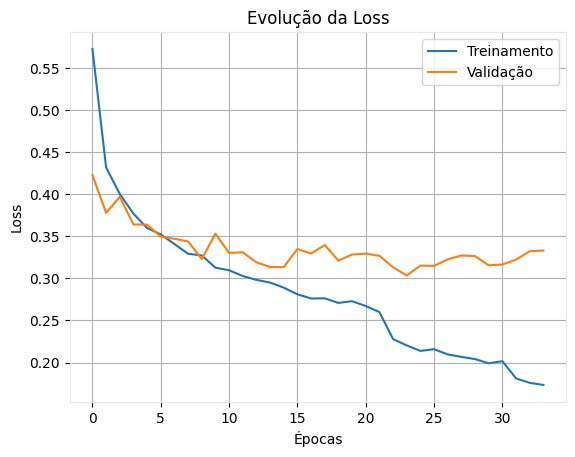

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Evolução da Loss')
plt.legend()
plt.grid(True)
plt.show()

# Análise

O que foi ajustado:

learning_rate inicial aumentado de 0.0005 -> 0.001

patience do EarlyStopping aumentado de 7 para 10

ReduceLROnPlateau(factor=0.5, patience=7)


# Comportamento do modelo

Épocas iniciais (1–10) val_loss caiu de 0.43 para 0.31

Épocas médias (10–21)	Pequenas oscilações, mas val_accuracy se manteve estável (~0.88–0.89)

A partir da época 22 ReduceLROnPlateau foi acionado e lr caiu para 0.0005 (22 learning_rate: 5.0000e-04), depois 0.00025 (31 learning_rate: 2.5000e-04)

Até época 33 val_loss oscilou levemente, mas val_accuracy chegou a 0.9012 (32).

# Revisão do que foi executado:

1. Implementação Inicial

Criado modelo MLP com duas camadas densas (512 e 256 neurônios) e ativação ReLU.

Camadas Dropout(0.3) adicionadas para reduzir overfitting.

Otimizador inicial: SGD. Resultados medianos.

---
2. Teste de Otimizadores

Comparados: SGD, Adam, RMSprop, Nadam.

Melhor desempenho: Adam (melhor val_loss, convergência estável).

RMSprop foi o pior (val_loss instável).

---
3. Ajuste de Hiperparâmetros

Aumentadas as épocas e os neurônios.

Adicionado EarlyStopping e ReduceLROnPlateau:

Inicialmente: learning_rate=0.0005, patience=7 -> parava por volta da epoch 27.

Ajustado para learning_rate=0.001, patience=10.

---
4. Resultados com Modelo Refinado

Modelo convergiu até a epoch 33 com excelente estabilidade.

Melhor val_accuracy atingida: 90,12%.

val_loss permaneceu em torno de 0.31, mostrando boa generalização.

ReduceLROnPlateau ativado duas vezes -> refinamento efetivo.

In [ ]:
model.save("modelo_final_t2_1.keras")

model.save_weights("pesos_only.weights.h5")

Se necessário, é possivel usar o modelo / pesos (sem estrutura) depois chamando:


###

from tensorflow import keras

model = keras.models.load_model("modelo_final_t2_1.keras")

model.load_weights("pesos_only.weights.h5")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np # Import numpy if not already imported

# Supondo que você já tenha isso:
# y_test       → array 1D com rótulos verdadeiros
# class_names  → nomes das classes do Fashion MNIST

# Make predictions with the final trained model
y_pred_probs = model.predict(X_test)

# y_pred_probs → predições do modelo (probabilidades)

y_pred_labels = np.argmax(y_pred_probs, axis=1)

print(classification_report(y_test, y_pred_labels, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.90      0.84      1000
     Trouser       0.95      0.98      0.97      1000
    Pullover       0.84      0.70      0.76      1000
       Dress       0.94      0.83      0.88      1000
        Coat       0.65      0.94      0.77      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.80      0.53      0.64      1000
     Sneaker       0.97      0.93      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.91      0.98      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



Conclusões:

O processo iniciou com a implementação de um modelo MLP com duas camadas densas (512 e 256 neurônios), ativação ReLU e Dropout para controle de overfitting. O otimizador inicial foi o SGD, que apresentou desempenho limitado tanto na taxa de convergência quanto na estabilidade da val_loss.

Com a troca para otimizadores mais robustos (Adam, RMSprop, Nadam), observou-se que Adam apresentou o melhor comportamento, combinando boa performance de validação com estabilidade. Esse foi então escolhido como base para o refinamento do modelo.

O refinamento incluiu o uso de EarlyStopping com paciência de 10 épocas e ReduceLROnPlateau, que permitiram avanços mesmo após platôs de perda. A taxa de aprendizado inicial foi elevada para 0.001, o que possibilitou avanços mais significativos nas primeiras épocas.

O modelo convergiu por volta da epoch 33, alcançando uma acurácia de validação próxima de 90% e mantendo a val_loss em torno de 0.31. O comportamento das curvas foi estável, sem indícios de overfitting agressivo.

A avaliação das predições finais sobre o conjunto de teste indicou uma acurácia global de 87%, com média ponderada de F1-score também em 87%, demonstrando um bom equilíbrio entre precisão e recall geral.

As métricas por classe revelaram pontos fortes, como alta performance nas classes "Sandal" (F1=0.97), "Bag" (F1=0.98), e "Ankle boot" (F1=0.95), que são visualmente distintas e fáceis de separar mesmo por modelos MLP. Por outro lado, as classes "Pullover", "Coat" e principalmente "Shirt" apresentaram os piores desempenhos, com destaque para "Shirt", que teve apenas 53% de recall e F1-score de 0.64.

Esses resultados indicam que o modelo apresenta dificuldade em diferenciar itens com semelhança visual ou sobreposição de características, especialmente em classes com variações sutis, como camisas e blusas.

A análise qualitativa das imagens erroneamente classificadas confirmou essa tendência, mostrando confusões frequentes entre "T-shirt/top", "Pullover", "Shirt" e "Coat".

Como resultado final, a combinação de ajustes nos hiperparâmetros, uso de callbacks inteligentes e escolha adequada do otimizador permitiu alcançar desempenho competitivo com arquitetura MLP pura. O modelo demonstrou boa generalização e pode servir como baseline sólido para etapas futuras com arquiteturas mais especializadas, como redes convolucionais.

*Les carottes sont cuites!* 🥕🥕🥕